<a href="https://colab.research.google.com/github/nijatmaharramov/Time_series_analysis_and_forecasting/blob/main/potatoes_price_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading data and importing libraries

In [ ]:
# run the cell first and click choose files popping up under the cell, then download the file named "potatoes_price_forecasting_data.csv"
from google.colab import files
uploaded = files.upload()

Saving potatoes_price_forecasting_data.csv to potatoes_price_forecasting_data (1).csv


In [ ]:
# Python libraries which I'll use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install openpyxl xlrd

In [ ]:
# I have downloaded data from website called "aqrarbazar.az" then make some adjustments on data to fit in google colab
df = pd.read_csv('/content/potatoes_price_forecasting_data.csv', encoding='iso-8859-1')
df

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8
0,N,M?hsulun ad?,M?hsulun n?v?,?l?? vahidi,Tarix,A?a??,Orta,Yuxar?
1,1,Kartof,Tovuz kartofu,kq,30.07.2019,0.4,NaN,0.45
2,2,Kartof,Tovuz kartofu,kq,06.12.2019,0.5,NaN,0.7
3,3,Kartof,Tovuz kartofu,kq,01.06.2020,0.34,NaN,0.4
4,4,Kartof,Tovuz kartofu,kq,17.06.2020,0.3,NaN,0.4
...,...,...,...,...,...,...,...,...
395,395,Kartof,Kartof,kq,22.04.2025,0.9,1.1,1.3
396,396,Kartof,Kartof,kq,25.04.2025,1.1,1.2,1.3
397,397,Kartof,Kartof,kq,29.04.2025,1.1,1.25,1.4
398,398,Kartof,Kartof,kq,02.05.2025,1,1.1,1.2


# Data preprocessing and understanding

In [ ]:
# we dont want our columns to be named like following
df.columns

Index(['Column1', 'Column2', 'Column3', 'Column4', 'Column5', 'Column6',
       'Column7', 'Column8'],
      dtype='object')

In [ ]:
# so I write a code to make first row (which is named exactly like we'd want) as a column name
import pandas as pd

first_row = df.iloc[0]

new_df = pd.DataFrame(columns=first_row)

df = df.drop(df.index[0])

df = df.reset_index(drop=True)

for index, row in df.iterrows():
  new_row = pd.DataFrame([row.values], columns=first_row.values)
  new_df = pd.concat([new_df,new_row],ignore_index = True)
new_df


,N,M?hsulun ad?,M?hsulun n?v?,?l?? vahidi,Tarix,A?a??,Orta,Yuxar?
0,1,Kartof,Tovuz kartofu,kq,30.07.2019,0.4,NaN,0.45
1,2,Kartof,Tovuz kartofu,kq,06.12.2019,0.5,NaN,0.7
2,3,Kartof,Tovuz kartofu,kq,01.06.2020,0.34,NaN,0.4
3,4,Kartof,Tovuz kartofu,kq,17.06.2020,0.3,NaN,0.4
4,5,Kartof,Tovuz kartofu,kq,21.07.2020,0.35,NaN,0.4
...,...,...,...,...,...,...,...,...
394,395,Kartof,Kartof,kq,22.04.2025,0.9,1.1,1.3
395,396,Kartof,Kartof,kq,25.04.2025,1.1,1.2,1.3
396,397,Kartof,Kartof,kq,29.04.2025,1.1,1.25,1.4
397,398,Kartof,Kartof,kq,02.05.2025,1,1.1,1.2


In [ ]:
# we have to make some changes on column names to make them understandable
new_df = new_df.rename(columns = {'M?hsulun ad?' : 'Məhsulun adı',
                                  'M?hsulun n?v?' : 'Məhsulun növü',
                                  '?l?? vahidi' : 'Ölçü vahidi',
                                  'A?a??' : 'Aşağı',
                                  'Yuxar?' : 'Yuxarı'})
new_df

,N,Məhsulun adı,Məhsulun növü,Ölçü vahidi,Tarix,Aşağı,Orta,Yuxarı
0,1,Kartof,Tovuz kartofu,kq,30.07.2019,0.4,NaN,0.45
1,2,Kartof,Tovuz kartofu,kq,06.12.2019,0.5,NaN,0.7
2,3,Kartof,Tovuz kartofu,kq,01.06.2020,0.34,NaN,0.4
3,4,Kartof,Tovuz kartofu,kq,17.06.2020,0.3,NaN,0.4
4,5,Kartof,Tovuz kartofu,kq,21.07.2020,0.35,NaN,0.4
...,...,...,...,...,...,...,...,...
394,395,Kartof,Kartof,kq,22.04.2025,0.9,1.1,1.3
395,396,Kartof,Kartof,kq,25.04.2025,1.1,1.2,1.3
396,397,Kartof,Kartof,kq,29.04.2025,1.1,1.25,1.4
397,398,Kartof,Kartof,kq,02.05.2025,1,1.1,1.2


In [ ]:
# Checking null values (I will handle them later)
new_df.isna().sum()

,0
N,0
Məhsulun adı,0
Məhsulun növü,0
Ölçü vahidi,0
Tarix,0
Aşağı,84
Orta,79
Yuxarı,84


In [ ]:
new_df.info() # it is obvious that we have only null columns on price columns. I will fill them(especially I will fill 'Orta', because we will continue with that column)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   N              399 non-null    object
 1   Məhsulun adı   399 non-null    object
 2   Məhsulun növü  399 non-null    object
 3   Ölçü vahidi    399 non-null    object
 4   Tarix          399 non-null    object
 5   Aşağı          315 non-null    object
 6   Orta           320 non-null    object
 7   Yuxarı         315 non-null    object
dtypes: object(8)
memory usage: 25.1+ KB


# Feature engineering

In [ ]:
# We need to look at the datatypes and change if necessary, and we see that datatype of the columns called "Tarix, Aşağı, Orta, Yuxarı" is object. We need to change them accordingly.
new_df.dtypes

,0
N,object
Məhsulun adı,object
Məhsulun növü,object
Ölçü vahidi,object
Tarix,object
Aşağı,object
Orta,object
Yuxarı,object


In [ ]:
# by the following code I changed datatypes accordingly
new_df['Aşağı'] = new_df['Aşağı'].astype('float')
new_df['Orta'] = new_df['Orta'].astype('float')
new_df['Yuxarı'] = new_df['Yuxarı'].astype('float')
new_df['Tarix'] = pd.to_datetime(new_df['Tarix'], errors='coerce', dayfirst = True)
new_df.dtypes

,0
N,object
Məhsulun adı,object
Məhsulun növü,object
Ölçü vahidi,object
Tarix,datetime64[ns]
Aşağı,float64
Orta,float64
Yuxarı,float64


In [ ]:
# we don't have any duplicate values
new_df.duplicated().sum()

np.int64(0)

In [ ]:
# we need to look at value counts and decide which columns will not help our future model at all (especially looking at uniqueness)
new_df['Məhsulun adı'].value_counts() # I will delete this column, because there is just one name and it won't make any help

,count
Məhsulun adı,
Kartof,399


In [ ]:
new_df['Ölçü vahidi'].value_counts() # same as above

,count
Ölçü vahidi,
kq,399


In [ ]:
new_df['N'].value_counts() # and this column is an index, so because of having index in our df we don't need one more.

,count
N,
399,1
1,1
2,1
3,1
4,1
...,...
20,1
19,1
18,1


In [ ]:
#dropping the unnecessary columns
new_df.drop(['Məhsulun adı', 'Ölçü vahidi', 'N'], axis=1, inplace=True)
new_df.head()

,Məhsulun növü,Tarix,Aşağı,Orta,Yuxarı
0,Tovuz kartofu,2019-07-30,0.40,NaN,0.45
1,Tovuz kartofu,2019-12-06,0.50,NaN,0.70
2,Tovuz kartofu,2020-06-01,0.34,NaN,0.40
3,Tovuz kartofu,2020-06-17,0.30,NaN,0.40
4,Tovuz kartofu,2020-07-21,0.35,NaN,0.40


In [ ]:
new_df['Məhsulun növü'].value_counts() # we see that there are some sort of potatoes that have data equal to 1. With this little data our model can be misleaded and not be able to forecast correctly.

,count
Məhsulun növü,
Kartof,347
Tovuz kartofu,38
T?z? kartof,11
Q?±rm?±z?± kartof,1
Hollandiya kartofu,1
?°ran kartofu,1


In [ ]:
# 1. I will update my  df that i won't have the sorts of potatoes with little or no info
new_df = new_df[~((new_df['Məhsulun növü'] == 'Q?±rm?±z?± kartof') |
                  (new_df['Məhsulun növü'] == 'Hollandiya kartofu') |
                  (new_df['Məhsulun növü'] == '?°ran kartofu'))]

# 2. I will adjust the name of 'T?z? kartof'

new_df['Məhsulun növü'] = new_df['Məhsulun növü'].replace('T?z? kartof', 'Təzə kartof')

new_df.head(), new_df['Məhsulun növü'].value_counts()

<ipython-input-24-e0fa8c27bbed>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Məhsulun növü'] = new_df['Məhsulun növü'].replace('T?z? kartof', 'Təzə kartof')


(   Məhsulun növü      Tarix  Aşağı  Orta  Yuxarı
 0  Tovuz kartofu 2019-07-30   0.40   NaN    0.45
 1  Tovuz kartofu 2019-12-06   0.50   NaN    0.70
 2  Tovuz kartofu 2020-06-01   0.34   NaN    0.40
 3  Tovuz kartofu 2020-06-17   0.30   NaN    0.40
 4  Tovuz kartofu 2020-07-21   0.35   NaN    0.40,
 Məhsulun növü
 Kartof           347
 Tovuz kartofu     38
 Təzə kartof       11
 Name: count, dtype: int64)

In [ ]:
# 1. we need to fill firstly 'Aşağı' and 'Yuxarı' columns, because we will use them to find out 'Orta' price that we will use throughout our project
# 2. in our data whenever there are missing values on 'Aşağı' and 'Yuxarı' columns, 'Orta' columns values exist. So we have to create a condition to fill missing values for 'Orta' column
#    when we have both 'Aşağı' and 'Yuxarı' columns values, otherwise it can make number smaller.

condition = (
    new_df['Orta'].isna() &
    new_df['Aşağı'].notna() &
    new_df['Yuxarı'].notna()
)

new_df.loc[condition, 'Orta'] = (
    (new_df.loc[condition, 'Aşağı'] + new_df.loc[condition, 'Yuxarı']) / 2
)

In [ ]:
new_df.isna().sum()

,0
Məhsulun növü,0
Tarix,0
Aşağı,84
Orta,0
Yuxarı,84


so we see we don't have null values for 'Orta' column which is our main concern. Because, we will drop 'Aşağı' and 'Yuxarı' columns.

In [ ]:
new_df.tail()

,Məhsulun növü,Tarix,Aşağı,Orta,Yuxarı
394,Kartof,2025-04-22,0.9,1.10,1.3
395,Kartof,2025-04-25,1.1,1.20,1.3
396,Kartof,2025-04-29,1.1,1.25,1.4
397,Kartof,2025-05-02,1.0,1.10,1.2
398,Kartof,2025-05-06,0.9,1.00,1.1


In [ ]:
# so we drop 'Yuxarı', 'Aşağı' columns
new_df.drop(['Yuxarı', 'Aşağı'], axis=1, inplace=True)
new_df.head()

In [ ]:
# and let's already change the column name of 'Orta'
new_df = new_df.rename(columns = {'Orta' : 'Qiymət'})
new_df.head()

,Məhsulun növü,Tarix,Qiymət
0,Tovuz kartofu,2019-07-30,0.425
1,Tovuz kartofu,2019-12-06,0.600
2,Tovuz kartofu,2020-06-01,0.370
3,Tovuz kartofu,2020-06-17,0.350
4,Tovuz kartofu,2020-07-21,0.375


In [ ]:
# now we need to sort values by Date because we will create Time Series model which will depend on the sequence of Date
new_df = new_df.sort_values(by='Tarix').reset_index(drop=True)
new_df

,Məhsulun növü,Tarix,Qiymət
0,Təzə kartof,2017-06-07,0.65
1,Təzə kartof,2017-06-09,0.50
2,Təzə kartof,2017-06-20,0.50
3,Təzə kartof,2017-06-23,0.50
4,Təzə kartof,2017-06-30,0.40
...,...,...,...
391,Kartof,2025-04-22,1.10
392,Kartof,2025-04-25,1.20
393,Kartof,2025-04-29,1.25
394,Kartof,2025-05-02,1.10


# EDA (Exploratory Data Analysis)

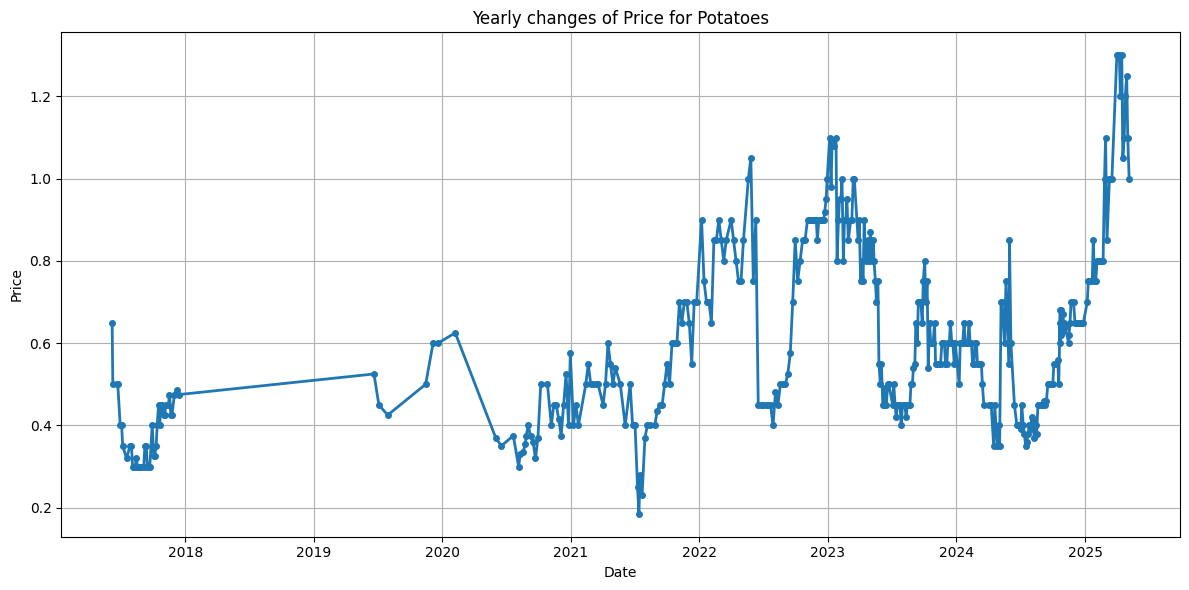

In [ ]:
# First let's look at the visualization of yearly changes

import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
plt.plot(new_df['Tarix'], new_df['Qiymət'], marker='o', linestyle='-', linewidth=2, markersize=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Yearly changes of Price for Potatoes')
plt.grid(True)
plt.tight_layout()
plt.show()

 We see that in general prices have stayed the same with some fluctuation(increasing and decreasing) from  2017 to 2022. Since 2022, prices have increased considerably, nevertheless we can't say that there is visible
 increasing trend.
 And another important point we can understand from this visualization that we dont have data for the dates from 2018 to the middle of 2019. I will handle this just right before creating my model.

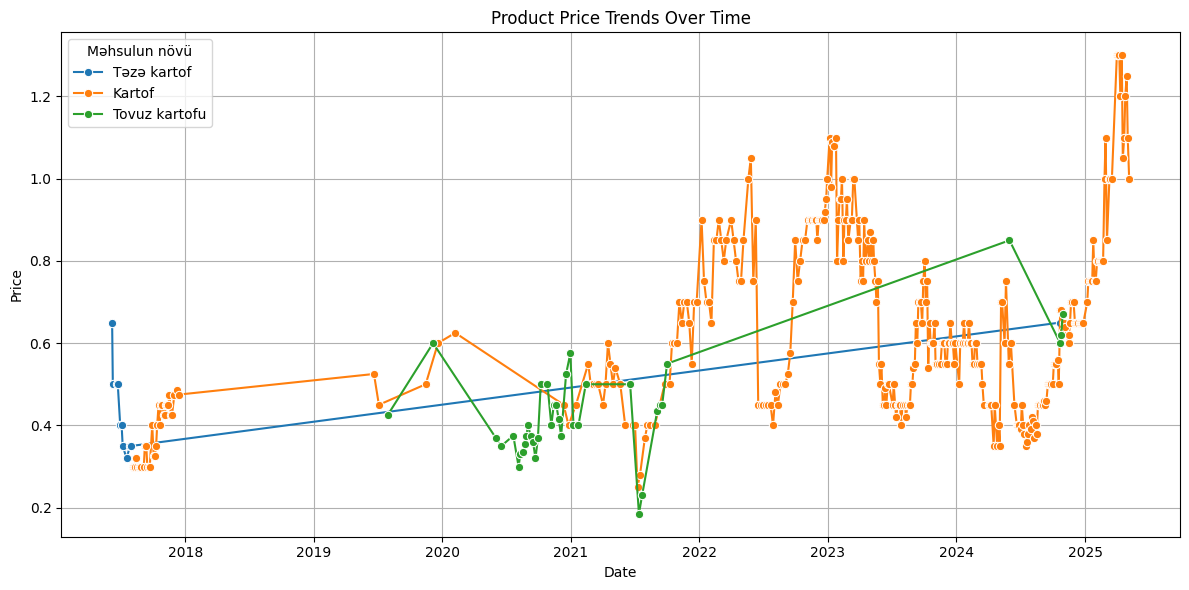

In [ ]:
# this cell will visualize the prices trend for the different sorts of potatoes
import seaborn as sns


plt.figure(figsize=(12, 6))
sns.lineplot(data=new_df, x='Tarix', y='Qiymət', hue='Məhsulun növü', marker='o')

plt.title('Product Price Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.tight_layout()
plt.show()


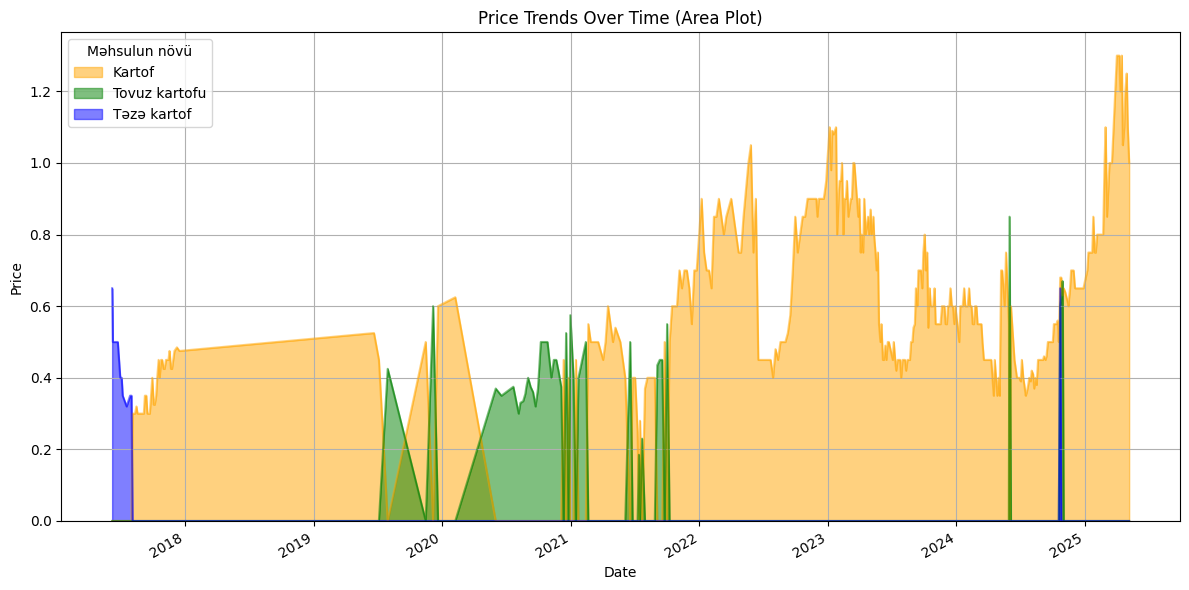

In [ ]:
# area plot
product_colors = {
    'Təzə kartof': 'blue',
    'Kartof': 'orange',
    'Tovuz kartofu': 'green'
}

df_pivot = new_df.pivot(index='Tarix', columns='Məhsulun növü', values='Qiymət')
df_pivot.plot(kind='area', stacked=False, figsize=(12, 6), alpha=0.5, color = product_colors)

plt.title('Price Trends Over Time (Area Plot)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
new_df[new_df['Məhsulun növü'] == 'Təzə kartof']

,Məhsulun növü,Tarix,Qiymət
0,Təzə kartof,2017-06-07,0.65
1,Təzə kartof,2017-06-09,0.50
2,Təzə kartof,2017-06-20,0.50
3,Təzə kartof,2017-06-23,0.50
4,Təzə kartof,2017-06-30,0.40
5,Təzə kartof,2017-07-04,0.40
6,Təzə kartof,2017-07-07,0.35
7,Təzə kartof,2017-07-18,0.32
8,Təzə kartof,2017-07-28,0.35
9,Təzə kartof,2017-08-01,0.35


It is obvious that price for product named 'Kartof' has increased considerably with some fluctuations during 7year period. But for other sorts of potatoes, we cant say same. The sort named  'Tovuz kartofu' doesn't show any trend, however it has some increase in the end of the period, while price for the sort named 'Təzə kartof'(blue line) has stayed almost same in the end.
In this visualization there is important point too that we have null values from 2017 to 2024 for the sort named 'Təzə kartof' and in 2024 only we have one data. So we have 2 options for this case:
*   the first one is to delete those rows with 'Təzə kartof' values. Because, this data for prediction is not enough and filling that kind of big gap for small data is not correct approach.
*   the second one is to mix those data with the data of the sort named 'Kartof'. This depends on some cases in real work condition.





In [ ]:
new_df['Məhsulun növü'].value_counts()

,count
Məhsulun növü,
Kartof,347
Tovuz kartofu,38
Təzə kartof,11


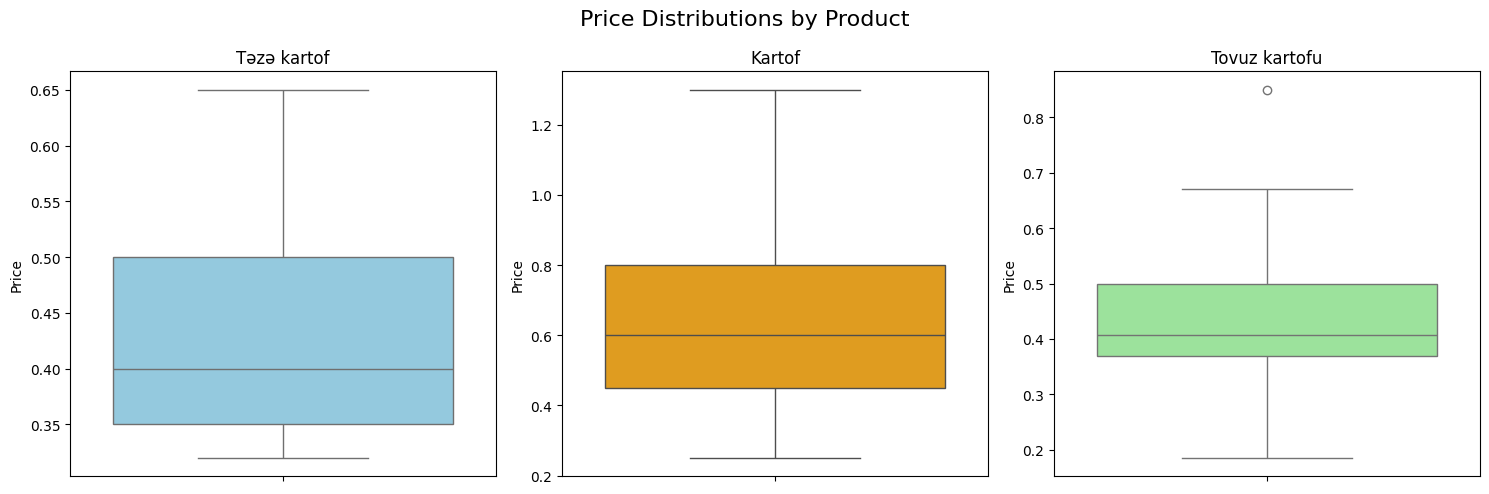

In [ ]:
# now let's look for statistical measurements (distributions, medians, outliers etc.) by using boxplots


fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True)
products = new_df['Məhsulun növü'].unique()
product_colors = {
    'Təzə kartof': 'skyblue',
    'Kartof': 'orange',
    'Tovuz kartofu': 'lightgreen'
}

for i, product in enumerate(products):
    sns.boxplot(data=new_df[new_df['Məhsulun növü'] == product], y='Qiymət', color=product_colors[product], ax=axes[i])
    axes[i].set_title(f'{product}')
    axes[i].set_ylabel('Price')
    axes[i].set_xlabel('')

plt.suptitle('Price Distributions by Product', fontsize=16)
plt.tight_layout()



By visualizing boxplots, we can define the median line inside the boxes and we can easily see that there aren't outlier values for 'Kartof' and 'Təzə kartof'. For the sort named 'Tovuz kartofu' has one outlier price value.

# Splitting data to Train and Test (This is to show to get insight about how to divide data for this kind of problems into Train and Test)

This will not be used in our model. I will seperate in a different way!!!

In [ ]:
timesteps = new_df['Tarix'].to_numpy()
prices = new_df['Qiymət'].to_numpy()

In [ ]:
# we can't use "sklearn.model_selection.train_test_split " to split data to train test to forecast future prediction, because it splits randomly.
# we need to split data sequentially because we are creating forecasting model which depends on sequence.


split_size = int(0.9 * len(new_df))

X_train, y_train = timesteps[:split_size], prices[:split_size]
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test),len(y_train), len(y_test)

(356, 40, 356, 40)

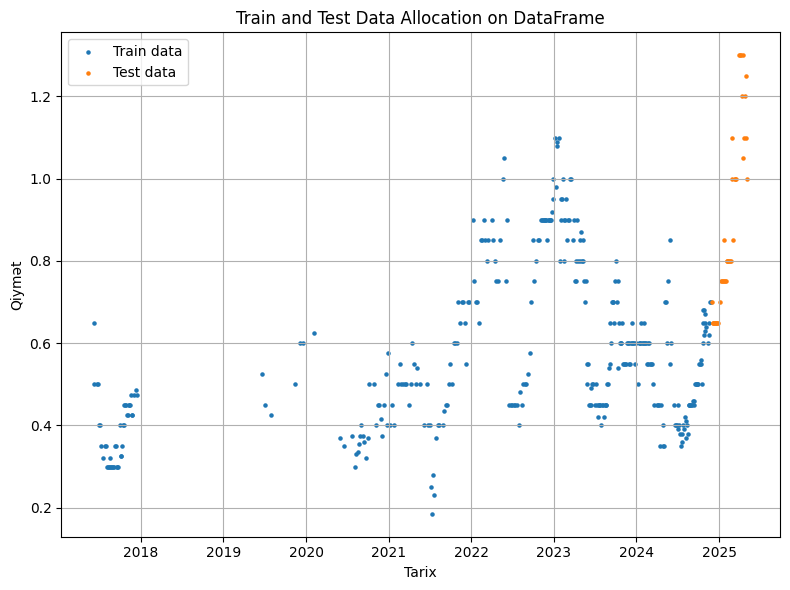

In [ ]:
# let's plot to see our train and test data's allocation on graph

plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, s=5, label='Train data')
plt.scatter(X_test, y_test, s=5, label='Test data')
plt.xlabel('Tarix')
plt.ylabel('Qiymət')
plt.title('Train and Test Data Allocation on DataFrame')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Data has been divided sequentially, this is how data is split into Train and Test for forecasting models.

# Finding monthly mean and putting new value to the given month as a monthly value representer

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
#  because in some months we have 3, on others 4, others don't have any values. it can worsen model's performance.


monthly_df = new_df.set_index('Tarix')
monthly_df = monthly_df['Qiymət'].resample('M').mean()
monthly_df


<ipython-input-46-eea4816b1234>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = monthly_df['Qiymət'].resample('M').mean()


,Qiymət
Tarix,
2017-06-30,0.510000
2017-07-31,0.355000
2017-08-31,0.307778
2017-09-30,0.328571
2017-10-31,0.397222
2017-11-30,0.442857
2017-12-31,0.478333
2018-01-31,NaN
2018-02-28,NaN


There are some null values. This can degrade our model's performance. There are some ways I've used so far to deal with null values. At this time, I will use linear filling to fill the gap.(this method can be changed based on requirements)

In [ ]:
monthly_df = monthly_df.asfreq('M')  # we need to make sure every month is represented
monthly_df = monthly_df.interpolate(method='linear')
monthly_df

<ipython-input-47-02e40df2f8d8>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = monthly_df.asfreq('M')  # we need to make sure every month is represented


,Qiymət
Tarix,
2017-06-30,0.510000
2017-07-31,0.355000
2017-08-31,0.307778
2017-09-30,0.328571
2017-10-31,0.397222
2017-11-30,0.442857
2017-12-31,0.478333
2018-01-31,0.480926
2018-02-28,0.483519


In [ ]:
pd.reset_option('display.max_rows')

# 1.SARIMAX Model

The reason why I use model from ARMA family:


*   Because it works well with even as few as 30–50 data points;
*   Captures trend and seasonality effectively.

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

monthly_df.index = pd.to_datetime(monthly_df.index)
model_arma = SARIMAX(monthly_df, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
result = model_arma.fit()
forecast = result.forecast(steps=7)

Predicted prices for the rest of the year of 2025 by "SARIMAX" model

In [ ]:
forecast # for upcoming 7 months

,predicted_mean
2025-06-30,0.897901
2025-07-31,0.813867
2025-08-31,0.838117
2025-09-30,0.923450
2025-10-31,1.009564
2025-11-30,1.030697
2025-12-31,1.044656


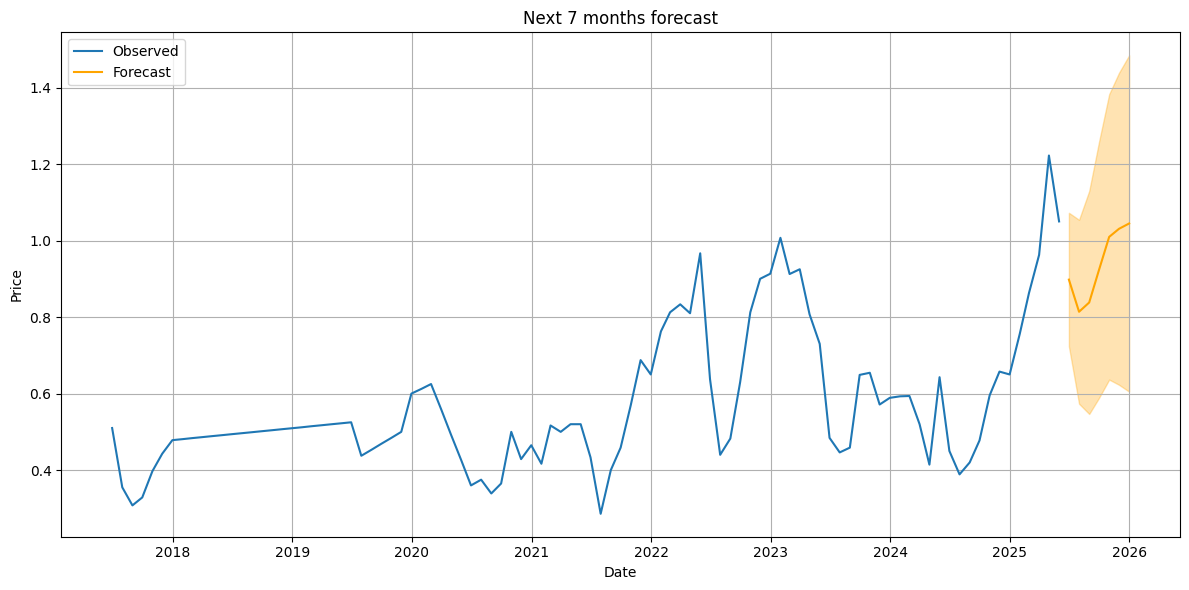

In [ ]:
# let's visualize predictions with confidence interval

predicted_mean = forecast
predicted_mean_ci = result.get_forecast(steps=7).conf_int()

plt.figure(figsize=(12, 6))
plt.plot(monthly_df, label='Observed')
plt.plot(predicted_mean, label='Forecast', color='orange')
plt.fill_between(predicted_mean_ci.index,
                 predicted_mean_ci.iloc[:, 0],
                 predicted_mean_ci.iloc[:, 1], color='orange', alpha=0.3)
plt.title('Next 7 months forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

It is visible that our model predicts between confidence interval(0.95).

Model evaluation (MAE) for SARIMAX

In [ ]:
from sklearn.metrics import mean_absolute_error

train_ds = monthly_df.iloc[:-6] # we take last 6 months data as test data and all before that training data
test_ds = monthly_df.iloc[-6:]

model = SARIMAX(train_ds, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
result = model.fit()
forecast = result.forecast(steps=len(test_ds))

mae = mean_absolute_error(test_ds, forecast)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 0.23620757693538005


# 2.Prophet Model

The reason why I used the Prophet model:

*   Because it is robust to missing data and outliers;
*   Works well with irregular time series;
*   Designed to handle seasonality and trend components automatically;
*   Making it especially effective for business and economic forecasting tasks.





In [ ]:
from prophet import Prophet

df = monthly_df.reset_index().rename(columns={'Tarix': 'ds', 'Qiymət': 'y'})
model = Prophet()
model.fit(df)
future = model.make_future_dataframe(periods=7, freq='M') # asfreq = 'M' means it shows monthly frequency, and periods=7 is because we have 7 months ahead to predictfor the rest of 2025
forecast = model.predict(future)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_j94iqq_/5g0qnvxb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_j94iqq_/1r_sghpt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51211', 'data', 'file=/tmp/tmp_j94iqq_/5g0qnvxb.json', 'init=/tmp/tmp_j94iqq_/1r_sghpt.json', 'output', 'file=/tmp/tmp_j94iqq_/prophet_modelu5pcaw03/prophet_model-20250513065743.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:57:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:57:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Predicted prices for the rest of the year of 2025 by "Prophet" model

In [ ]:
# for upcoming 7 months
forecast_2025 = forecast[(forecast['ds'].dt.year == 2025) & (forecast['ds'].dt.month >= 5)]
forecast_2025[['ds', 'yhat']] # yhat is forecasted value here

,ds,yhat
95,2025-05-31,0.803398
96,2025-06-30,0.655720
97,2025-07-31,0.572304
98,2025-08-31,0.585303
99,2025-09-30,0.636627
100,2025-10-31,0.731063
101,2025-11-30,0.757637
102,2025-12-31,0.770931


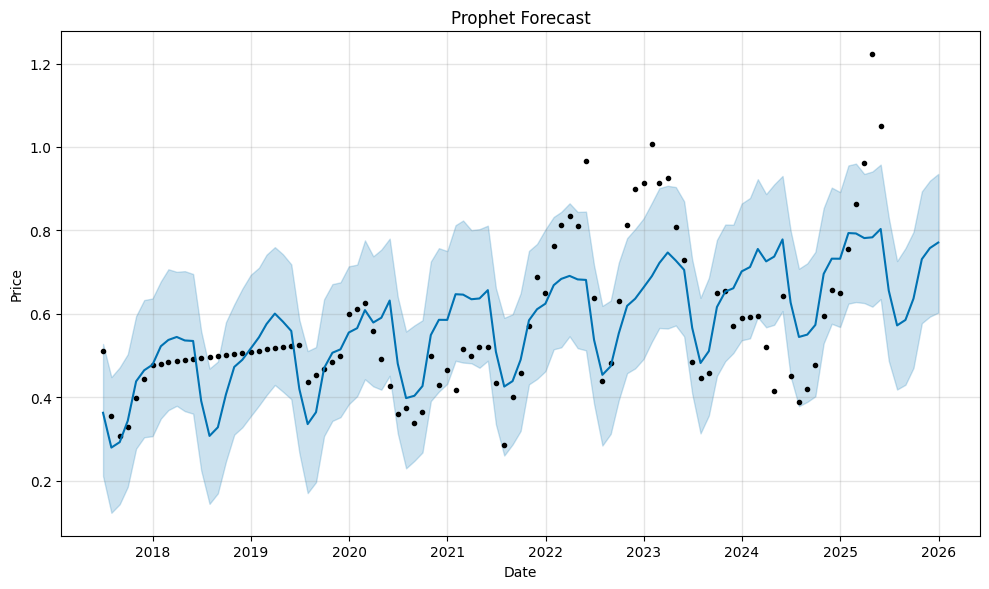

In [ ]:
fig = model.plot(forecast)
plt.title('Prophet Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.tight_layout()
plt.show()

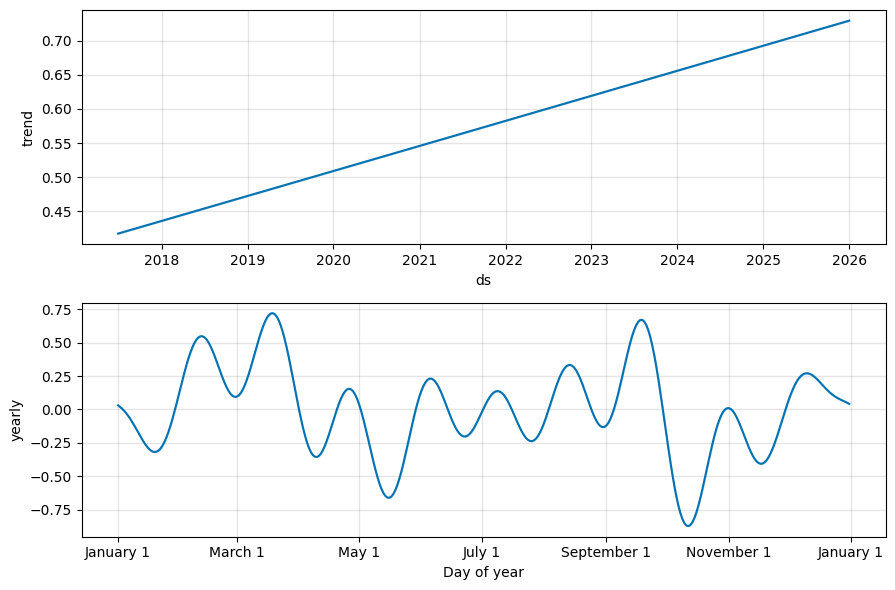

In [ ]:
fig2 = model.plot_components(forecast)
plt.show()

MAE for Prophet

In [ ]:
# let's evaluate our model

df = monthly_df.reset_index().rename(columns={'Tarix': 'ds', 'Qiymət': 'y'})

train_ds = df.iloc[:-6]
test_ds = df.iloc[-6:]

model = Prophet()
model.fit(train_ds)

future = model.make_future_dataframe(periods=len(test_ds), freq='M')
forecast = model.predict(future)

forecast_test = forecast.set_index('ds').loc[test_ds['ds']]
y_true = test_ds['y'].values
y_pred = forecast_test['yhat'].values

mae = mean_absolute_error(y_true, y_pred)
print(f'Mean Absolute Error: {mae}')

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_j94iqq_/fawu6cbl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_j94iqq_/zxoe7jje.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18954', 'data', 'file=/tmp/tmp_j94iqq_/fawu6cbl.json', 'init=/tmp/tmp_j94iqq_/zxoe7jje.json', 'output', 'file=/tmp/tmp_j94iqq_/prophet_modelsypks8a9/prophet_model-20250513065752.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:57:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:57:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mean Absolute Error: 0.2153504614368903


In general, We used 2 models and Prophet model looks more promising for future use.